# Name of Contributor: Piyush Bhujbal
# Title: Anime Exploratory Data Analysis and Prediction

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("All_Anime.csv")
data.head()

,Unnamed: 0,Name_of_Anime,Story,Year,Duration,Certificate,Genre,Rating
0,0,Attack on Titan,After his hometown is destroyed and his mother...,2013-2023,24 min,TV-MA,"Animation, Action, Adventure",0.0
1,1,"Bastard!! Heavy Metal, Dark Fantasy",When evil forces threaten to resurrect Anthras...,2022,25 min,TV-MA,"Animation, Action, Adventure",6.8
2,2,One Piece,Follows the adventures of Monkey D. Luffy and ...,1999,24 min,TV-14,"Animation, Action, Adventure",8.8
3,3,Spy x Family,A spy on an undercover mission gets married an...,2022,NaN,TV-14,"Animation, Action, Comedy",8.7
4,4,Demon Slayer: Kimetsu no Yaiba,A family is attacked by demons and only two me...,2019,24 min,TV-MA,"Animation, Action, Adventure",8.7


## Extracting the dataset and deriving the general model

In [3]:
data.shape

(6069, 8)

In [4]:
data['Story']

0       After his hometown is destroyed and his mother...
1       When evil forces threaten to resurrect Anthras...
2       Follows the adventures of Monkey D. Luffy and ...
3       A spy on an undercover mission gets married an...
4       A family is attacked by demons and only two me...
                              ...                        
6064    The Numbers come under attack from terrorists ...
6065    The Sekirei attend a mandatory measurement che...
6066                                           Add a Plot
6067                                           Add a Plot
6068    Wakana and Shinju's secret plan was a success,...
Name: Story, Length: 6069, dtype: object

In [5]:
data.drop("Story", axis = 1, inplace = True)

In [6]:
data.head()

,Unnamed: 0,Name_of_Anime,Year,Duration,Certificate,Genre,Rating
0,0,Attack on Titan,2013-2023,24 min,TV-MA,"Animation, Action, Adventure",0.0
1,1,"Bastard!! Heavy Metal, Dark Fantasy",2022,25 min,TV-MA,"Animation, Action, Adventure",6.8
2,2,One Piece,1999,24 min,TV-14,"Animation, Action, Adventure",8.8
3,3,Spy x Family,2022,NaN,TV-14,"Animation, Action, Comedy",8.7
4,4,Demon Slayer: Kimetsu no Yaiba,2019,24 min,TV-MA,"Animation, Action, Adventure",8.7


In [7]:
data['Certificate'].unique()

array(['TV-MA', 'TV-14', nan, 'TV-PG', 'PG', 'Not Rated', 'PG-13',
       'TV-Y7', 'R', 'G', 'TV-Y7-FV', 'TV-Y', 'Unrated', 'X', 'TV-G',
       'TV-13', 'T', 'AO', 'M', 'E', 'Approved', 'E10+', 'K-A'],
      dtype=object)

In [8]:
data.drop("Certificate", axis = 1, inplace = True)

In [9]:
data.head()

,Unnamed: 0,Name_of_Anime,Year,Duration,Genre,Rating
0,0,Attack on Titan,2013-2023,24 min,"Animation, Action, Adventure",0.0
1,1,"Bastard!! Heavy Metal, Dark Fantasy",2022,25 min,"Animation, Action, Adventure",6.8
2,2,One Piece,1999,24 min,"Animation, Action, Adventure",8.8
3,3,Spy x Family,2022,NaN,"Animation, Action, Comedy",8.7
4,4,Demon Slayer: Kimetsu no Yaiba,2019,24 min,"Animation, Action, Adventure",8.7


In [10]:
data['Year'].unique()

array(['2013-2023', '2022', '1999', '2019', '2007-2017', '2011-2014',
       '2016', '2006-2007', '2001', '2002-2007', '2020', '1992',
       '2004-2012', '2009-2012', '2012', '2015-2019', '2004', '2017',
       '1989-2003', '2017-2021', '2012-2018', '2015', '1998-1999', '1988',
       '2021', '1997-1998', '1997', '2014-2020', '1995-1996', '2005-2018',
       '2006-2012', '2004-2010', '2015-2018', '2018-2020', '2014-2021',
       '2014', '1986-1989', '2011-2015', '2019-2021', '2009-2019',
       '2005-2008', '2010-2011', '2008', 'I 2000-2006', '2013-2016',
       '1995', '2018', '1998', '2021-2022', '2014-2015', '1989', '2006',
       '2010-2012', '1986', '1984', '2013', '2016-2017', '1996',
       '2008-2010', '2000', '2012-2014', '2010', '2004-2005', '2003-2004',
       'I 2021', '2017-2019', '2012-2015', '2015-2016', '2002',
       '2000-2004', '1989-1996', '1992-1995', '2007-2008', '1992-1997',
       '2011-2012', '2001-2007', '1995-2003', '1991', '2023', '2013-2014',
       '2011'

In [11]:
data['Rating'].unique()

array([0. , 6.8, 8.8, 8.7, 7.3, 8.4, 8.6, 8.5, 6.9, 8.2, 9.1, 7.6, 8.3,
       7.7, 8.9, 7.9, 7.5, 7.2, 6.7, 8.1, 7.8, 7.4, 6.2, nan, 6.3, 6.1,
       7.1, 6.6, 6.5, 5.7, 6.4, 5.9, 5.8, 5.1, 5.5, 5.6, 5.4, 5.2, 4.9,
       1.3, 4.5, 1.8, 4.1, 4.3, 5.3, 4.8, 3.8, 2.7, 9.2, 3.9, 4.7, 4.4,
       3.3, 3.6, 3.7, 4.6, 4.2, 2.4, 2.6, 1.7, 3.2, 3.5, 3.4, 2.5, 3.1,
       2.8, 2.1, 2.2, 9.4])

In [12]:
data['Rating'] = data["Rating"].replace(np.nan, 0)

In [13]:
data['Rating'].unique()

array([0. , 6.8, 8.8, 8.7, 7.3, 8.4, 8.6, 8.5, 6.9, 8.2, 9.1, 7.6, 8.3,
       7.7, 8.9, 7.9, 7.5, 7.2, 6.7, 8.1, 7.8, 7.4, 6.2, 6.3, 6.1, 7.1,
       6.6, 6.5, 5.7, 6.4, 5.9, 5.8, 5.1, 5.5, 5.6, 5.4, 5.2, 4.9, 1.3,
       4.5, 1.8, 4.1, 4.3, 5.3, 4.8, 3.8, 2.7, 9.2, 3.9, 4.7, 4.4, 3.3,
       3.6, 3.7, 4.6, 4.2, 2.4, 2.6, 1.7, 3.2, 3.5, 3.4, 2.5, 3.1, 2.8,
       2.1, 2.2, 9.4])

In [14]:
data.isna().sum()

Unnamed: 0          0
Name_of_Anime       0
Year               52
Duration         1921
Genre              24
Rating              0
dtype: int64

In [15]:
data["Duration"].unique()

array(['24 min', '25 min', nan, '120 min', '125 min', '180 min', '30 min',
       '119 min', '106 min', '23 min', '89 min', '112 min', '134 min',
       '45 min', '325 min', '121 min', '124 min', '86 min', '81 min',
       '117 min', '130 min', '13 min', '264 min', '101 min', '83 min',
       '87 min', '103 min', '90 min', '22 min', '100 min', '126 min',
       '10 min', '50 min', '94 min', '109 min', '113 min', '111 min',
       '137 min', '75 min', '26 min', '154 min', '316 min', '91 min',
       '63 min', '115 min', '46 min', '84 min', '165 min', '300 min',
       '71 min', '12 min', '21 min', '27 min', '104 min', '360 min',
       '95 min', '80 min', '102 min', '110 min', '76 min', '82 min',
       '85 min', '96 min', '60 min', '98 min', '92 min', '20 min',
       '97 min', '151 min', '122 min', '114 min', '16 min', '33 min',
       '51 min', '384 min', '47 min', '160 min', '99 min', '253 min',
       '108 min', '118 min', '4 min', '15 min', '93 min', '116 min',
       '136 min', '

## Data filtering

In [16]:
data["Duration"] = data["Duration"].str.replace(" min", "")

In [17]:
data['Duration']

0        24
1        25
2        24
3       NaN
4        24
       ... 
6064    NaN
6065     28
6066     23
6067     24
6068     24
Name: Duration, Length: 6069, dtype: object

In [18]:
data["Duration"] = data["Duration"].str.replace(",", "")

In [19]:
data['Duration'].isna().sum()

1921

In [20]:
data["Duration"] = data["Duration"].replace(np.nan, 0)

In [21]:
data['Duration'] = data['Duration'].astype("int64")

In [22]:
data.head()

,Unnamed: 0,Name_of_Anime,Year,Duration,Genre,Rating
0,0,Attack on Titan,2013-2023,24,"Animation, Action, Adventure",0.0
1,1,"Bastard!! Heavy Metal, Dark Fantasy",2022,25,"Animation, Action, Adventure",6.8
2,2,One Piece,1999,24,"Animation, Action, Adventure",8.8
3,3,Spy x Family,2022,0,"Animation, Action, Comedy",8.7
4,4,Demon Slayer: Kimetsu no Yaiba,2019,24,"Animation, Action, Adventure",8.7


In [23]:
data["Name_of_Anime"].value_counts()

 Rebelde                                                         439
 SMG4                                                             14
 Corncast                                                          6
 World's End Harem                                                 5
 Crying Freeman                                                    5
                                                                ... 
Mobile Police Patlabor: The Early Days                             1
Tekkaman Blade                                                     1
The Disappearance of Nagato Yuki-chan                              1
Orenchi no Furo Jijou                                              1
UQ Holder! Mahou Sensei Negima! Setsuna de Eien na First Kiss      1
Name: Name_of_Anime, Length: 5504, dtype: int64

In [24]:
data.rename(
    columns = {"Name_of_Anime":"name"}, inplace = True
)

In [25]:
data.Year.dtype

dtype('O')

In [26]:
data['Year'] = data["Year"].str.replace("-", " ")

In [27]:
data["Year"].head()

0    2013 2023
1         2022
2         1999
3         2022
4         2019
Name: Year, dtype: object

In [28]:
data["Year"].unique()

array(['2013 2023', '2022', '1999', '2019', '2007 2017', '2011 2014',
       '2016', '2006 2007', '2001', '2002 2007', '2020', '1992',
       '2004 2012', '2009 2012', '2012', '2015 2019', '2004', '2017',
       '1989 2003', '2017 2021', '2012 2018', '2015', '1998 1999', '1988',
       '2021', '1997 1998', '1997', '2014 2020', '1995 1996', '2005 2018',
       '2006 2012', '2004 2010', '2015 2018', '2018 2020', '2014 2021',
       '2014', '1986 1989', '2011 2015', '2019 2021', '2009 2019',
       '2005 2008', '2010 2011', '2008', 'I 2000 2006', '2013 2016',
       '1995', '2018', '1998', '2021 2022', '2014 2015', '1989', '2006',
       '2010 2012', '1986', '1984', '2013', '2016 2017', '1996',
       '2008 2010', '2000', '2012 2014', '2010', '2004 2005', '2003 2004',
       'I 2021', '2017 2019', '2012 2015', '2015 2016', '2002',
       '2000 2004', '1989 1996', '1992 1995', '2007 2008', '1992 1997',
       '2011 2012', '2001 2007', '1995 2003', '1991', '2023', '2013 2014',
       '2011'

In [29]:
data["Year"].dtype

dtype('O')

In [30]:
data["Year"] = data["Year"].str.replace("I", "")
data["Year"] = data["Year"].str.replace("II", "")
data["Year"] = data["Year"].str.replace("III", "")
data["Year"] = data["Year"].str.replace("IV", "")
data["Year"] = data["Year"].str.replace("Vide", "")

In [31]:
data["Year"].unique()

array(['2013 2023', '2022', '1999', '2019', '2007 2017', '2011 2014',
       '2016', '2006 2007', '2001', '2002 2007', '2020', '1992',
       '2004 2012', '2009 2012', '2012', '2015 2019', '2004', '2017',
       '1989 2003', '2017 2021', '2012 2018', '2015', '1998 1999', '1988',
       '2021', '1997 1998', '1997', '2014 2020', '1995 1996', '2005 2018',
       '2006 2012', '2004 2010', '2015 2018', '2018 2020', '2014 2021',
       '2014', '1986 1989', '2011 2015', '2019 2021', '2009 2019',
       '2005 2008', '2010 2011', '2008', ' 2000 2006', '2013 2016',
       '1995', '2018', '1998', '2021 2022', '2014 2015', '1989', '2006',
       '2010 2012', '1986', '1984', '2013', '2016 2017', '1996',
       '2008 2010', '2000', '2012 2014', '2010', '2004 2005', '2003 2004',
       ' 2021', '2017 2019', '2012 2015', '2015 2016', '2002',
       '2000 2004', '1989 1996', '1992 1995', '2007 2008', '1992 1997',
       '2011 2012', '2001 2007', '1995 2003', '1991', '2023', '2013 2014',
       '2011', 

In [32]:
data["Year"] = data["Year"].str.replace("V", "")

In [33]:
data["Year"] = data["Year"].str.replace(" ", "")

In [34]:
data["Year"].unique()

array(['20132023', '2022', '1999', '2019', '20072017', '20112014', '2016',
       '20062007', '2001', '20022007', '2020', '1992', '20042012',
       '20092012', '2012', '20152019', '2004', '2017', '19892003',
       '20172021', '20122018', '2015', '19981999', '1988', '2021',
       '19971998', '1997', '20142020', '19951996', '20052018', '20062012',
       '20042010', '20152018', '20182020', '20142021', '2014', '19861989',
       '20112015', '20192021', '20092019', '20052008', '20102011', '2008',
       '20002006', '20132016', '1995', '2018', '1998', '20212022',
       '20142015', '1989', '2006', '20102012', '1986', '1984', '2013',
       '20162017', '1996', '20082010', '2000', '20122014', '2010',
       '20042005', '20032004', '20172019', '20122015', '20152016', '2002',
       '20002004', '19891996', '19921995', '20072008', '19921997',
       '20112012', '20012007', '19952003', '1991', '2023', '20132014',
       '2011', '20202022', '19931996', '2007', '19881997', '19992001',
       '20

In [35]:
data["Year"] = data["Year"].astype("str")

In [36]:
length = len(data["Year"])

In [37]:
data["Year"].dtype

dtype('O')

In [38]:
vals = []

for i in range(length):
    vals.append(data["Year"][i][0:4])

In [39]:
vals

['2013',
 '2022',
 '1999',
 '2022',
 '2019',
 '2022',
 '2007',
 '2011',
 '2016',
 '2006',
 '2001',
 '2002',
 '2020',
 '2019',
 '2019',
 '1992',
 '2004',
 '2009',
 '2012',
 '2015',
 '2004',
 '2017',
 '1989',
 '2017',
 '2016',
 '2012',
 '2017',
 '2015',
 '1998',
 '1988',
 '2021',
 '1997',
 '1997',
 '1997',
 '2022',
 '2014',
 '2017',
 '2021',
 '1995',
 '2005',
 '2006',
 '2004',
 '2019',
 '2015',
 '2018',
 '2021',
 '2014',
 '2012',
 '1988',
 '2014',
 '2022',
 '1988',
 '1997',
 '2021',
 '1986',
 '2021',
 '2011',
 '2020',
 '2016',
 '2021',
 '2022',
 '2020',
 '2019',
 '2016',
 '2009',
 '2005',
 '2019',
 '2012',
 '2016',
 '2010',
 '2021',
 '2008',
 '2016',
 '2022',
 '2000',
 '2013',
 '2019',
 '2022',
 '1995',
 '2018',
 '2022',
 '1998',
 '2021',
 '2012',
 '2014',
 '1997',
 '1989',
 '2006',
 '2010',
 '2018',
 '2019',
 '2019',
 '1986',
 '2018',
 '2022',
 '1984',
 '2022',
 '2022',
 '2018',
 '2014',
 '2013',
 '2016',
 '2021',
 '1996',
 '2004',
 '2014',
 '2021',
 '2015',
 '2018',
 '2008',
 '2022',
 

In [40]:
data["Year"] = vals
data.head()

,Unnamed: 0,name,Year,Duration,Genre,Rating
0,0,Attack on Titan,2013,24,"Animation, Action, Adventure",0.0
1,1,"Bastard!! Heavy Metal, Dark Fantasy",2022,25,"Animation, Action, Adventure",6.8
2,2,One Piece,1999,24,"Animation, Action, Adventure",8.8
3,3,Spy x Family,2022,0,"Animation, Action, Comedy",8.7
4,4,Demon Slayer: Kimetsu no Yaiba,2019,24,"Animation, Action, Adventure",8.7


In [41]:
data["Year"] = data["Year"].replace("", "0")

In [42]:
data["Year"].unique()

array(['2013', '2022', '1999', '2019', '2007', '2011', '2016', '2006',
       '2001', '2002', '2020', '1992', '2004', '2009', '2012', '2015',
       '2017', '1989', '1998', '1988', '2021', '1997', '2014', '1995',
       '2005', '2018', '1986', '2010', '2008', '2000', '1984', '1996',
       '2003', '1991', '2023', '1993', '1985', '1973', '1994', '1987',
       '1979', '1977', '2026', 'nan', '1970', '1981', '1990', '1967',
       '1983', '1978', '1969', '1971', '1976', '1982', '1974', '1975',
       '1972', '1980', '1963', '1964', '1968', '1965', '1960', '1958',
       '1966', '1959', '1945', '1962', '1917', '1907', '1943', '1934',
       '1931', '1947', '1933', '1961', '1948', '1946', '1935', '1944',
       '1925', '1924', '1929', '1918', '1938', '1932', '1950', '1928',
       '0'], dtype=object)

In [43]:
data["Year"] = data["Year"].replace("nan", "0")

In [44]:
data['Year'] = data["Year"].astype("int64")

In [45]:
data.drop("Unnamed: 0", axis = 1, inplace = True)

## Data Visualization and EDA Report creation

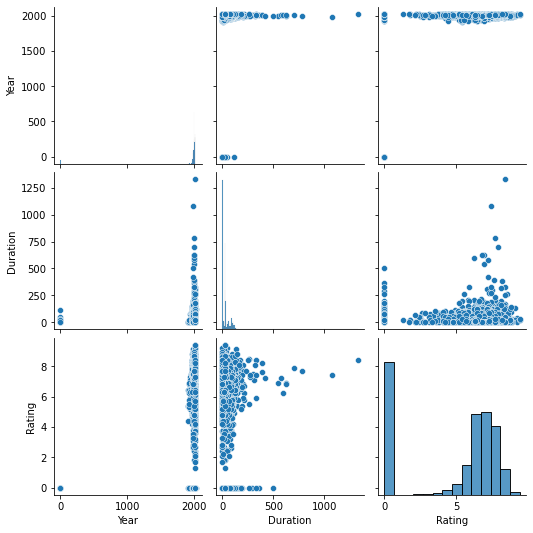

In [46]:
sns.pairplot(data)

In [47]:
from pandas_profiling import ProfileReport

In [48]:
anime_report = ProfileReport(
    data,
    title = "Anime Report Analysis"

)
anime_report.to_notebook_iframe()

In [49]:
# anime_report.to_file("Anime EDA Report.html")

In [50]:
co_relation = data.corr()

In [51]:
co_relation

,Year,Duration,Rating
Year,1.000000,0.047318,0.136880
Duration,0.047318,1.000000,0.172583
Rating,0.136880,0.172583,1.000000


<AxesSubplot:>

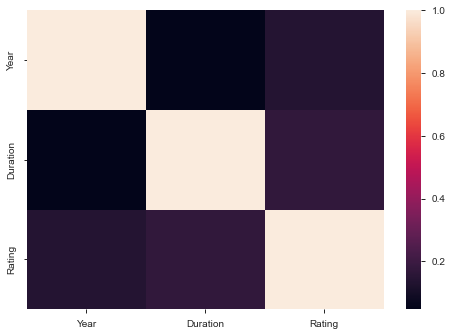

In [52]:
sns.heatmap(co_relation)

In [53]:
from matplotlib import pyplot as plt

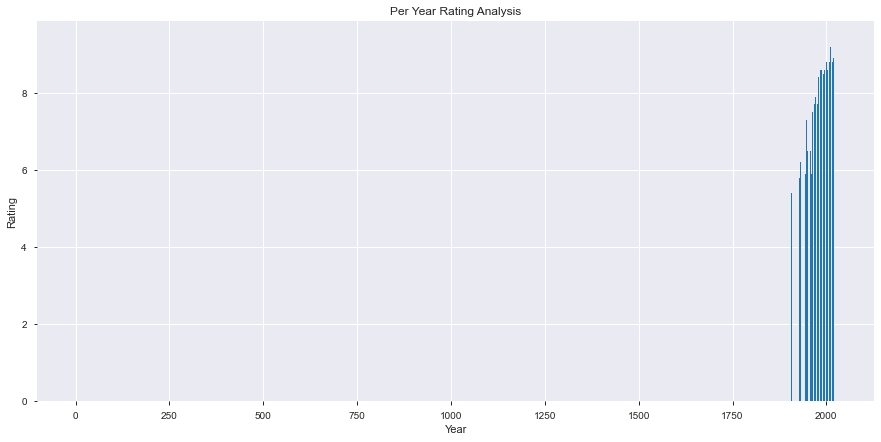

In [54]:
plt.figure(figsize = (15, 7))
plt.title("Per Year Rating Analysis")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.bar(data['Year'], data["Rating"])
plt.show()

Text(0.5, 1.0, 'Rating pattern per year')

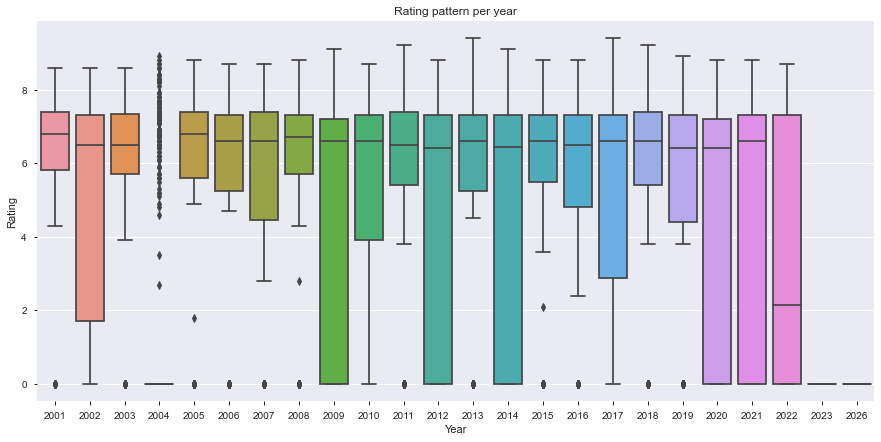

In [100]:
plt.figure(figsize = (15, 7))
plotter_data = data[data["Year"]>2000]
sns.boxplot(x = "Year", y = "Rating", data = plotter_data)
plt.title("Rating pattern per year")

In [56]:
min(data['Year'])
max(data['Year'])

2026

In [57]:
sample_df = data[data['Year'] > 1996].sort_values("Year", ascending = True)
sample_df.head()

,name,Year,Duration,Genre,Rating
2909,Psycho Diver: Soul Siren,1997,48,"Animation, Action, Horror",5.5
3732,Saber Marionette J Again,1997,50,"Animation, Action, Comedy",7.2
3728,Battle Athletes,1997,195,"Animation, Action, Comedy",6.6
5537,Psychic Force: Puzzle Taisen,1997,0,Action,0.0
4570,Eight Clouds Rising,1997,60,"Animation, Adventure, History",4.9


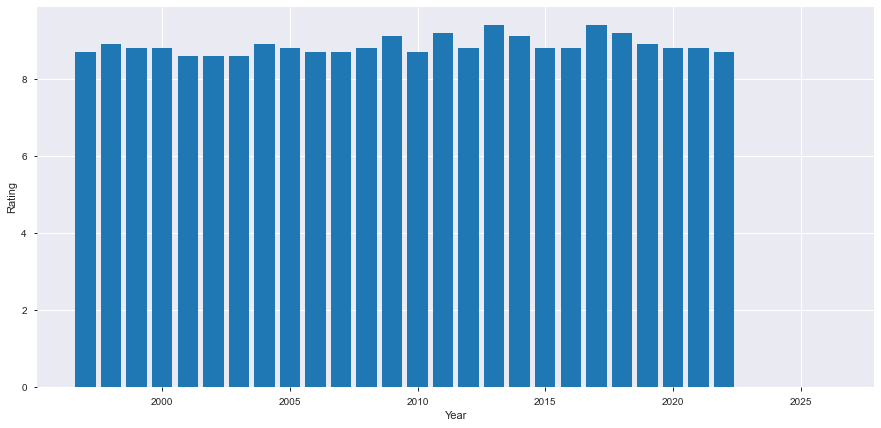

In [58]:
plt.figure(figsize = (15, 7))
plt.xlabel("Year")
plt.ylabel("Rating")
plt.bar(sample_df['Year'], sample_df['Rating'])
plt.show()

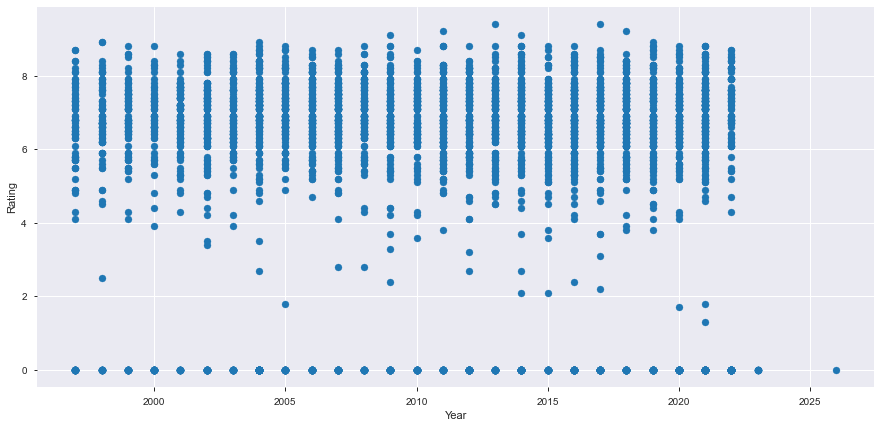

In [59]:
plt.figure(figsize = (15, 7))
plt.xlabel("Year")
plt.ylabel("Rating")
plt.scatter(sample_df['Year'], sample_df['Rating'])
plt.show()

In [60]:
ordered_df = data.sort_values("Year")

In [61]:
ordered_df.set_index("name")
ordered_df.head()

,name,Year,Duration,Genre,Rating
390,Twilight of the Gods,0,0,"Animation, Action, Adventure",0.0
4856,The Samaritan,0,0,"Short, Drama",0.0
4857,Untitled Hatsune Miku Series,0,0,"Animation, Comedy, Fantasy",0.0
4583,Megazone 23 SIN,0,0,"Animation, Action, Sci-Fi",0.0
4587,The Idolmaster Million Live!,0,0,"Animation, Music",0.0


### Taking out the rows with higest ratings and more duration 

In [62]:
ordered_df = ordered_df[(ordered_df['Year']>0) & (ordered_df['Duration'] > 5) & (ordered_df["Rating"] > 0.0)]

In [63]:
ordered_df.head()

,name,Year,Duration,Genre,Rating
5365,Dobutsu olympic taikai,1928,8,"Animation, Short",5.8
4955,The Stolen Lump,1929,10,"Animation, Short, Fantasy",6.9
5090,Tarô-san no kisha,1929,15,"Animation, Short",6.4
5243,Momotaro's Sky Adventure,1931,10,"Animation, Short",6.2
4382,Ugokie kori no tatehiki,1933,11,"Animation, Short",6.8


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

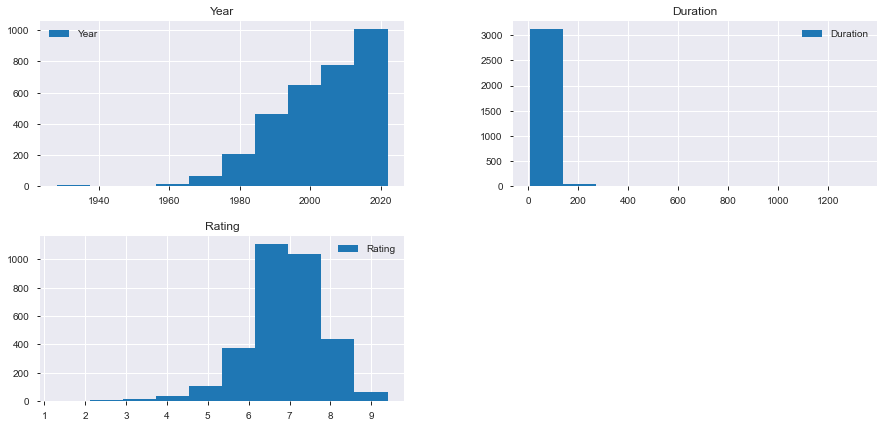

In [64]:
ordered_df.hist(figsize = (15, 7), legend = True)

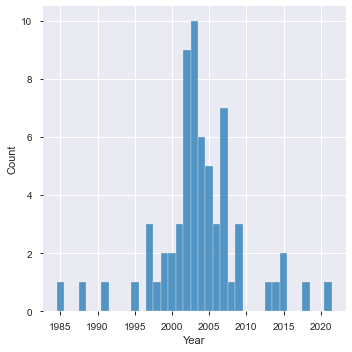

In [65]:
sns.displot(ordered_df.groupby(['Rating'])['Year'].mean(), discrete = True)

## Extracting columns that have ratings greater than 0, years av=bove 2000 and duration greater than 5 minutes

In [66]:
latest_df = ordered_df[(ordered_df['Year']>2000) & (ordered_df['Duration'] > 5) & (ordered_df["Rating"] > 0.0)]

In [67]:
latest_df.head()

,name,Year,Duration,Genre,Rating
2211,Mazinkaiser,2001,210,"Animation, Sci-Fi",7.7
3379,Hanaukyô meido-tai,2001,15,"Animation, Comedy, Romance",6.4
2833,Battle Doll Angelic Layer,2001,25,"Animation, Action, Comedy",6.9
3386,Figure 17,2001,780,"Animation, Adventure, Drama",7.7
1522,Hikaru no Go,2001,23,"Animation, Adventure, Drama",8.3


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

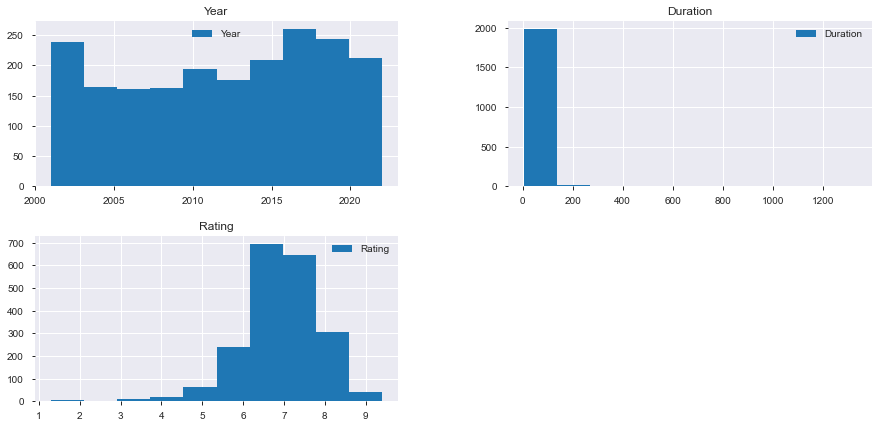

In [68]:
latest_df.hist(figsize = (15, 7), legend = True)

## Latest data frame data visualization phase

<AxesSubplot:xlabel='Duration', ylabel='Rating'>

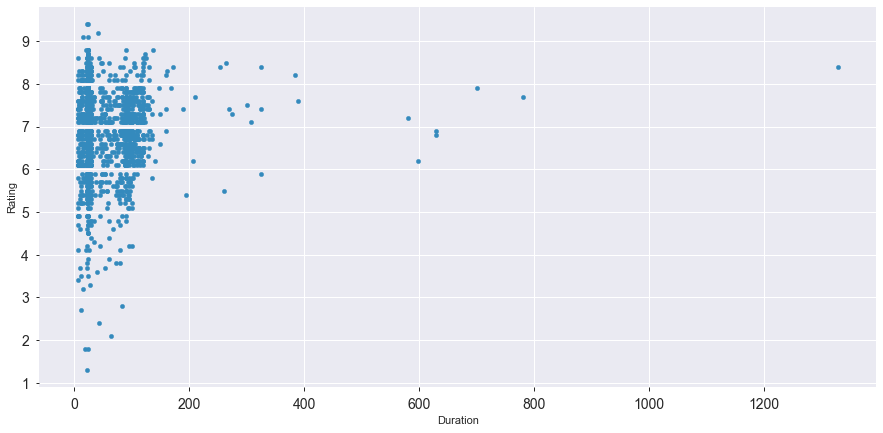

In [69]:
latest_df.plot(kind = "scatter", x = "Duration", y = "Rating", figsize = (15, 7), fontsize = 14)

<AxesSubplot:ylabel='Density'>

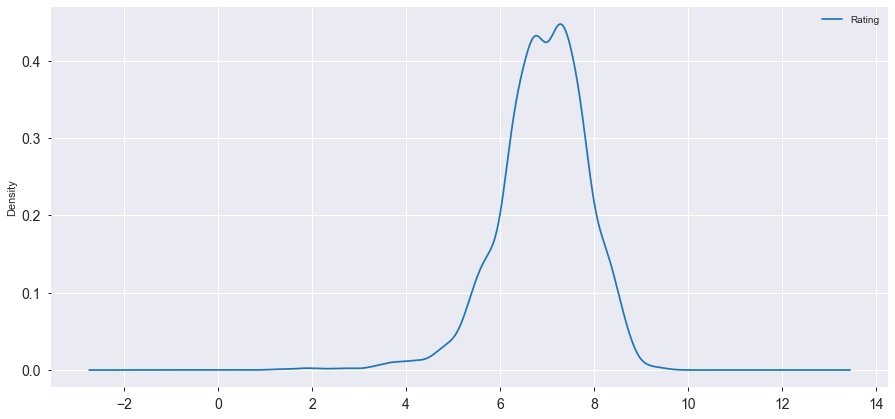

In [70]:
latest_df.plot(kind = "kde", x = "Duration", y = "Rating", figsize = (15, 7), fontsize = 14)

In [71]:
latest_report = ProfileReport(
    df = latest_df,
    title = "EDA Report from year 2000"

)
latest_report.to_notebook_iframe()

In [72]:
# latest_report.to_file("Latest report year.html")

In [73]:
latest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 2211 to 477
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      2023 non-null   object 
 1   Year      2023 non-null   int64  
 2   Duration  2023 non-null   int64  
 3   Genre     2021 non-null   object 
 4   Rating    2023 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 94.8+ KB


In [74]:
latest_df.describe()

,Year,Duration,Rating
count,2023.000000,2023.000000,2023.000000
mean,2011.939199,48.747405,6.905833
std,6.054138,59.560988,0.938265
min,2001.000000,6.000000,1.300000
25%,2007.000000,24.000000,6.400000
50%,2012.000000,25.000000,6.900000
75%,2017.000000,75.000000,7.500000
max,2022.000000,1329.000000,9.400000


In [75]:
latest_df.isna().sum()

name        0
Year        0
Duration    0
Genre       2
Rating      0
dtype: int64

In [76]:
latest_df.dropna()

,name,Year,Duration,Genre,Rating
2211,Mazinkaiser,2001,210,"Animation, Sci-Fi",7.7
3379,Hanaukyô meido-tai,2001,15,"Animation, Comedy, Romance",6.4
2833,Battle Doll Angelic Layer,2001,25,"Animation, Action, Comedy",6.9
3386,Figure 17,2001,780,"Animation, Adventure, Drama",7.7
1522,Hikaru no Go,2001,23,"Animation, Adventure, Drama",8.3
...,...,...,...,...,...
6068,My Dress-Up Darling,2022,24,"Animation, Comedy, Romance",8.2
615,Shenmue,2022,24,"Animation, Action, Adventure",7.5
534,The Strongest Sage with the Weakest Crest,2022,24,"Animation, Adventure, Fantasy",6.2
496,The Quintessential Quintuplets Movie,2022,136,"Animation, Comedy, Drama",7.6


## Extraction of random genre types

In [77]:
feature_1_df = latest_df[(latest_df["Genre"] == "Animation, Action, Comedy") | (latest_df["Genre"] == "Animation, Adventure, Drama") | (latest_df["Genre"] == "Animation, Comedy, Fantasy")]

In [78]:
feature_1_df.head()

,name,Year,Duration,Genre,Rating
2833,Battle Doll Angelic Layer,2001,25,"Animation, Action, Comedy",6.9
3386,Figure 17,2001,780,"Animation, Adventure, Drama",7.7
1522,Hikaru no Go,2001,23,"Animation, Adventure, Drama",8.3
4478,Yobarete tobidete! Akubi-chan,2001,25,"Animation, Comedy, Fantasy",7.7
1956,Mahoromatic,2001,24,"Animation, Action, Comedy",6.7


In [79]:
feature_1_df.shape

(251, 5)

In [80]:
feature_1_df.drop("name", axis = 1, inplace = True)

In [81]:
feature_1_df.head()

,Year,Duration,Genre,Rating
2833,2001,25,"Animation, Action, Comedy",6.9
3386,2001,780,"Animation, Adventure, Drama",7.7
1522,2001,23,"Animation, Adventure, Drama",8.3
4478,2001,25,"Animation, Comedy, Fantasy",7.7
1956,2001,24,"Animation, Action, Comedy",6.7


In [82]:
categorical = [col for col in feature_1_df.columns if feature_1_df[col].dtype == 'O']

In [83]:
genre = feature_1_df[categorical]

In [84]:
genre_type = pd.get_dummies(genre, drop_first = True)

In [85]:
genre_type.head()

,"Genre_Animation, Adventure, Drama","Genre_Animation, Comedy, Fantasy"
2833,0,0
3386,1,0
1522,1,0
4478,0,1
1956,0,0


## Creating a new data frame and listing the features

In [86]:
new_data = pd.concat([feature_1_df, genre_type], axis = 1)

In [87]:
new_data.head()

,Year,Duration,Genre,Rating,"Genre_Animation, Adventure, Drama","Genre_Animation, Comedy, Fantasy"
2833,2001,25,"Animation, Action, Comedy",6.9,0,0
3386,2001,780,"Animation, Adventure, Drama",7.7,1,0
1522,2001,23,"Animation, Adventure, Drama",8.3,1,0
4478,2001,25,"Animation, Comedy, Fantasy",7.7,0,1
1956,2001,24,"Animation, Action, Comedy",6.7,0,0


In [88]:
new_data.drop("Genre", axis = 1, inplace = True)

In [89]:
x = new_data.drop("Rating", axis = 1)
x.head()

,Year,Duration,"Genre_Animation, Adventure, Drama","Genre_Animation, Comedy, Fantasy"
2833,2001,25,0,0
3386,2001,780,1,0
1522,2001,23,1,0
4478,2001,25,0,1
1956,2001,24,0,0


In [90]:
y = new_data['Rating']
y

2833    6.9
3386    7.7
1522    8.3
4478    7.7
1956    6.7
       ... 
1097    7.3
1681    7.4
1682    6.7
665     6.4
233     7.2
Name: Rating, Length: 251, dtype: float64

## Extracting the ML models for the purpose

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [93]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_1.pkl",'wb')
        pickle.dump(model,file)
    

In [94]:
from sklearn import metrics
import pickle
from sklearn.linear_model import LinearRegression

Training score : 0.02038238276943105
predictions are: 
 [6.94689427 6.78240633 6.84774242 7.00136465 6.82555582 6.74502802
 6.89041443 6.90026905 6.81969784 6.8535136  7.18326323 6.77307261
 6.83488955 6.8384087  6.98418578 6.93461085 6.90378819 6.8757002
 6.93756055 6.88507733 7.03327249 6.87574361 7.11336938 6.92822682
 6.8103207  7.1818742  7.15070429 6.81978465 7.09774043 6.81978465
 6.93122508 6.86401932 6.84422328 7.11332597 6.82911838 6.80107379
 6.79308569 6.82890134 6.80107379 6.81314217 6.84774242 6.84800287
 6.89727594 6.81974124 6.8384087  7.19151178 6.87574361 6.79755464
 6.87170357 6.86636647 6.82911838 7.04243259 6.81040752 6.78666025
 6.75544693 6.75787773 6.84778583 6.89727594 6.81617869 6.85707615
 6.7540579  6.87222446 6.90326731 6.8286843  6.86350043 6.96877387
 6.87956345 6.79273843 6.87865189 6.74502802 6.78822091 7.04798988
 6.7442901  6.84778583 6.83488955 6.78722454 6.86020148 6.81570121
 6.93178938 6.91307851 7.14436566 6.83488955 7.17045692]


r2 score: -0.08

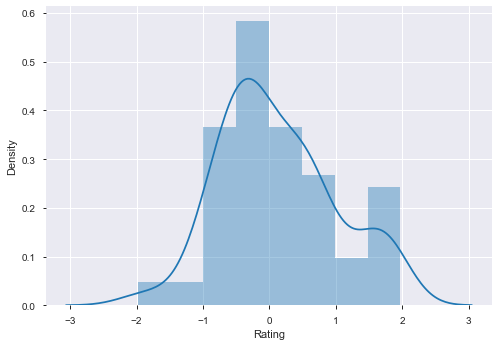

In [95]:
predict(LinearRegression(), 0)

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Training score : 0.8262338039229076
predictions are: 
 [6.3        7.26666667 6.6        6.4        7.2        5.4
 9.1        7.6        6.2        8.3        7.8        6.9
 6.25       6.94       7.7        6.7        6.3        6.55
 7.8        7.2        7.2        6.825      8.1        6.8
 6.2        7.8        8.1        6.5        5.7        6.5
 6.6        7.6        6.55       8.1        7.9        6.66666667
 7.3        7.8        6.66666667 6.6        6.6        7.6
 7.1        6.4        6.94       7.2        6.825      6.8
 9.1        6.55       7.9        6.7        7.65       7.2
 7.3        6.4        6.13333333 7.1        6.4        6.16666667
 5.4        7.25       9.1        9.1        6.9        6.8
 5.7        7.3        5.7        5.4        6.8        7.4
 5.4        6.13333333 6.25       7.2        6.9        4.9
 6.1        6.9        6.9        6.25       7.8       ]


r2 score: -1.3513362174524834
Mean Absolute Error: 1.0333333333333332
Mean Squared Error: 1

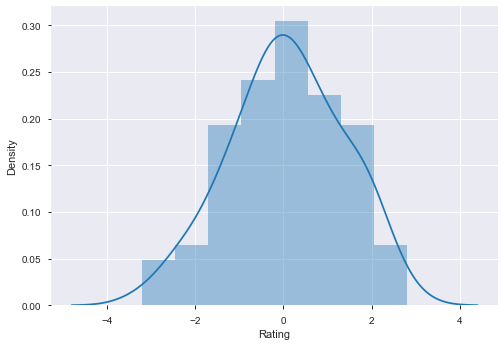

In [97]:
predict(DecisionTreeRegressor(), 1)

In [98]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_2.pkl",'wb')
        pickle.dump(model,file)
    

Training score : 0.7071919691827362
predictions are: 
 [6.85686667 7.27017857 6.4529     6.99566667 7.13790238 5.97721667
 6.9175     6.87603333 6.82766667 6.9375     7.025      7.00028333
 6.38194762 6.92988135 7.347      6.715      6.81766667 6.55814286
 7.53445    7.07144206 6.99433333 6.8071873  7.50398333 6.89396429
 6.8411     7.273      6.9315     6.87245833 6.72025    6.87245833
 6.695      6.874      6.97819762 7.63446667 7.59210833 6.7599254
 7.06533333 7.69130952 6.7599254  6.608      6.4529     7.12533333
 6.994      6.58198611 6.92988135 7.4        6.8071873  6.81368333
 7.0005     6.753      7.59210833 7.148      7.55272778 7.06833333
 7.2178     6.89813333 6.17657143 6.994      6.46383333 6.17835833
 6.832      7.11692024 7.22925    8.21625    6.974      7.055
 6.71       7.06833333 6.187      5.97721667 7.22378333 7.35666667
 6.3345     6.17657143 6.38194762 7.02933333 6.817      5.633
 6.547      6.90596429 6.828      6.38194762 6.605     ]


r2 score: -0.2160121141067

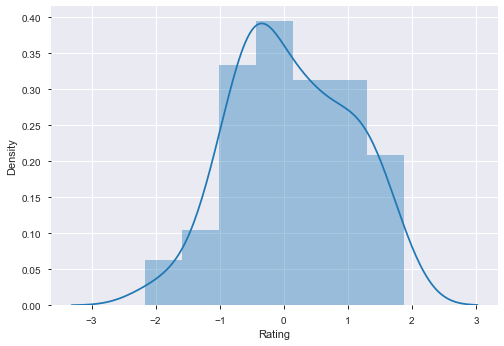

In [99]:
predict(RandomForestRegressor(), 1)

## Conclusion
### We tried to implement three model on our analyzed data. 
#### 1. Linear Regression
#### 2. Decision Tree Regressor
#### 3. Random Forest Regressor

### This was a continuous data thus, we applied the Regression Algorithms for this purpose.
### The training paramter was "Rating": This depicts the Anime ratings on scale of 10. We trained and tested our model with two random types of Anime Genres: 
#### 1. Animation, Adventure, Drama
#### 2. Animation, Comedy, Fantasy
## Results say that:
### 1. Linear Regression and Random Forest Algorithms show a very low training score and a high error values and due to which they are not the best fit models. The predictions of <u>Ratings</u> based on those models is also very low for the future years.
### 2. The Decision Tree on the other hand makes a very good predictions of ratings and we can say that the type of Animes we selected can catch more attention of audiences in the coming years. The evaluation metrics are stable and error results are very low this makes it fit to create a good predictive analysis example.